# Calidad del Agua

El agua segura y disponible fácilmente es esencial para la salud pública, ya sea para beber, para uso doméstico, para producción de alimentos o para fines recreativos. El mejoramiento del suministro de agua y saneamiento, junto con una gestión más eficiente de los recursos hídricos, puede impulsar el crecimiento económico de los países y contribuir significativamente a la reducción de la pobreza.

El agua contaminada y el saneamiento deficiente están relacionados con la transmisión de enfermedades como cólera, diarrea, disentería, hepatitis A, fiebre tifoidea y poliomielitis. Servicios de agua y saneamiento ausentes, inadecuados o mal gestionados exponen a las personas a riesgos de salud prevenibles. Esto es especialmente problemático en centros de atención médica, donde tanto pacientes como personal se enfrentan a un mayor riesgo de infecciones y enfermedades cuando faltan servicios de agua, saneamiento e higiene. A nivel mundial, 15% de los pacientes contraen una infección durante una estancia en el hospital, y esta proporción es mucho mayor en países de bajos ingresos.

Con esto en mente, me inspiré para usar este conjunto de datos de Calidad del Agua para entender qué contribuye a que el agua sea segura y potable, y aplicar aprendizaje automático para distinguir entre agua potable y no potable.

<div style="background-color:#B4DBE9;">
    <center><img src="https://raw.githubusercontent.com/jaykumar1607/Water-Quality/main/water_sanitation.gif">
</div>

## Importacion de librerias

In [363]:
import pandas as pd 
import numpy as np 
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.tools as tls
import plotly.figure_factory as ff

from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

# Modelling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

1. **ph**: pH del agua (0 a 14).

2. **Hardness**: Capacidad del agua para precipitar jabón en mg/L.

3. **Solids**: Total de sólidos disueltos en ppm.

4. **Chloramines**: Cantidad de cloraminas en ppm.

5. **Sulfate**: Cantidad de sulfatos disueltos en mg/L.

6. **Conductivity**: Conductividad eléctrica del agua en μS/cm.

7. **Organic_carbon**: Cantidad de carbono orgánico en ppm.

8. **Trihalomethanes**: Cantidad de trihalometanos en μg/L.

9. **Turbidity**: Medida de la propiedad de emisión de luz del agua en NTU.

10. **Potability**: Indica si el agua es segura para el consumo humano. Potable - 1 y No potable - 0.

In [364]:
data = pd.read_csv('Data/water_potability.csv')

In [365]:
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

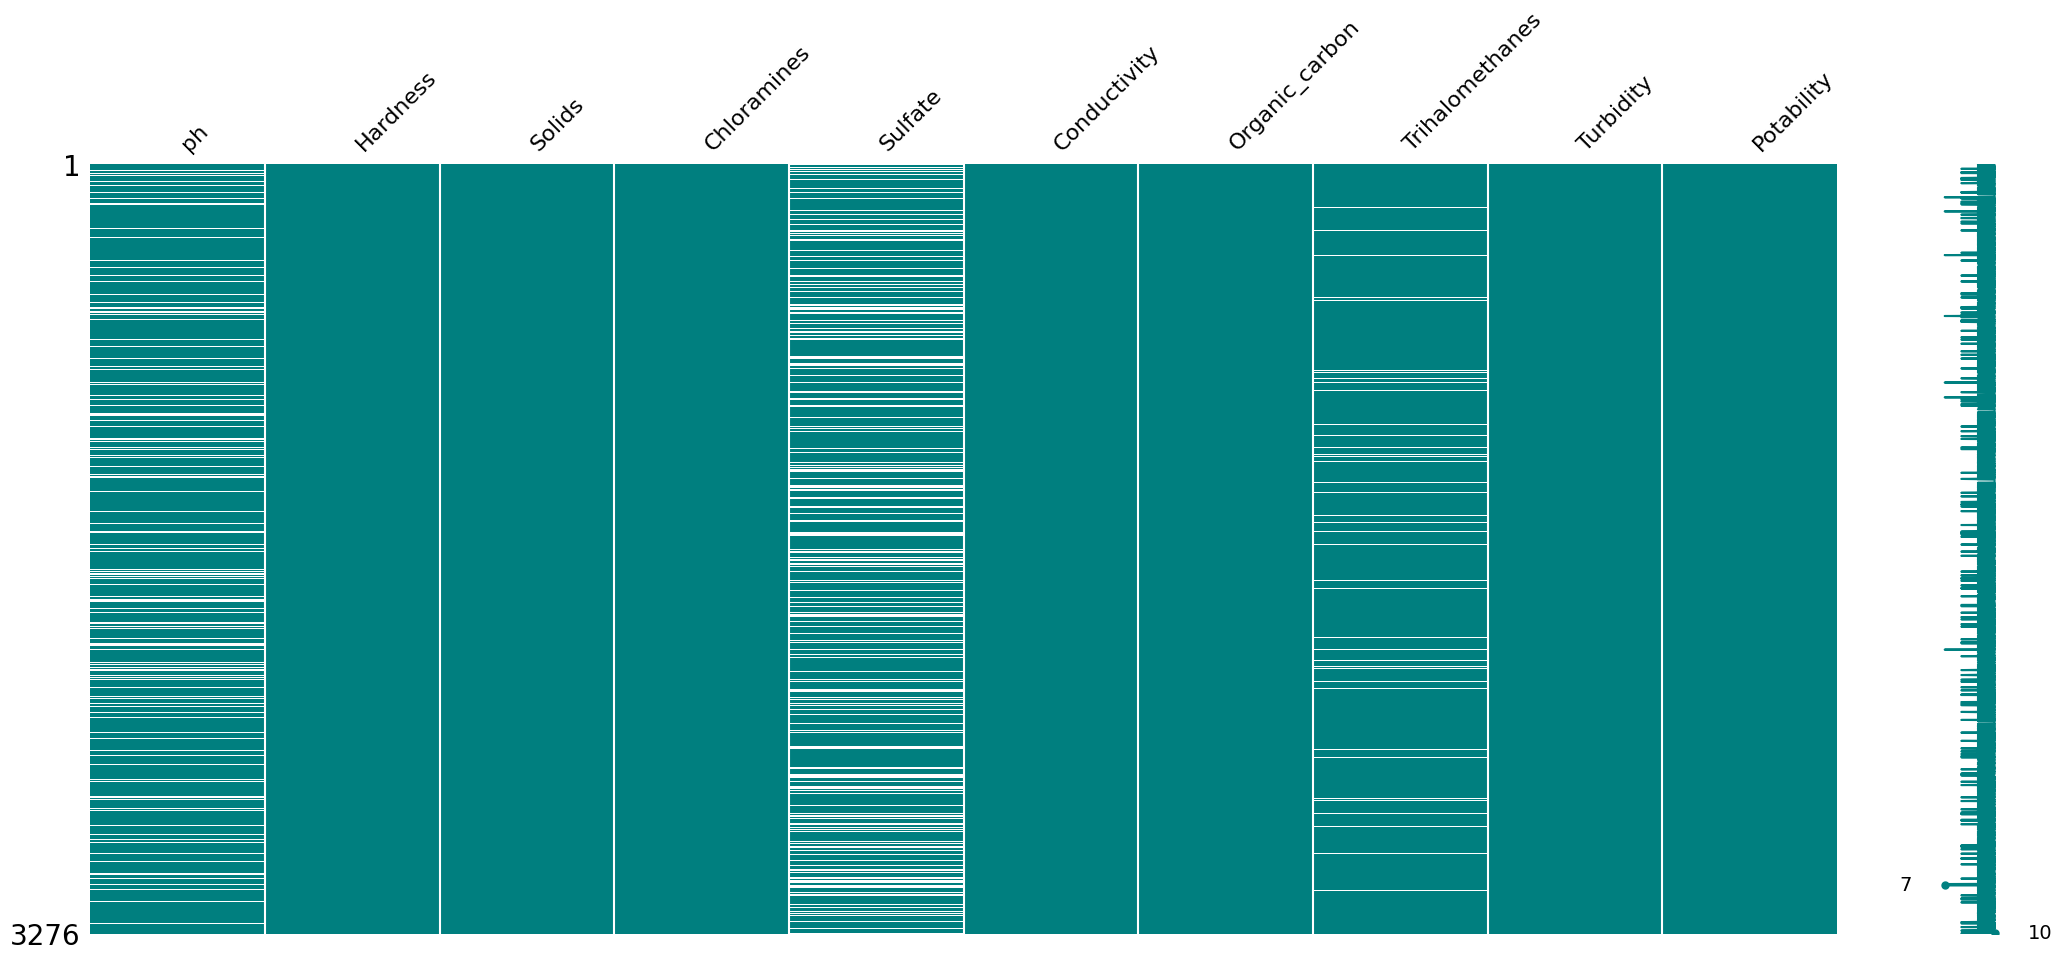

In [366]:
fig = msno.matrix(data,color=(0,0.5,0.5))

In [367]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

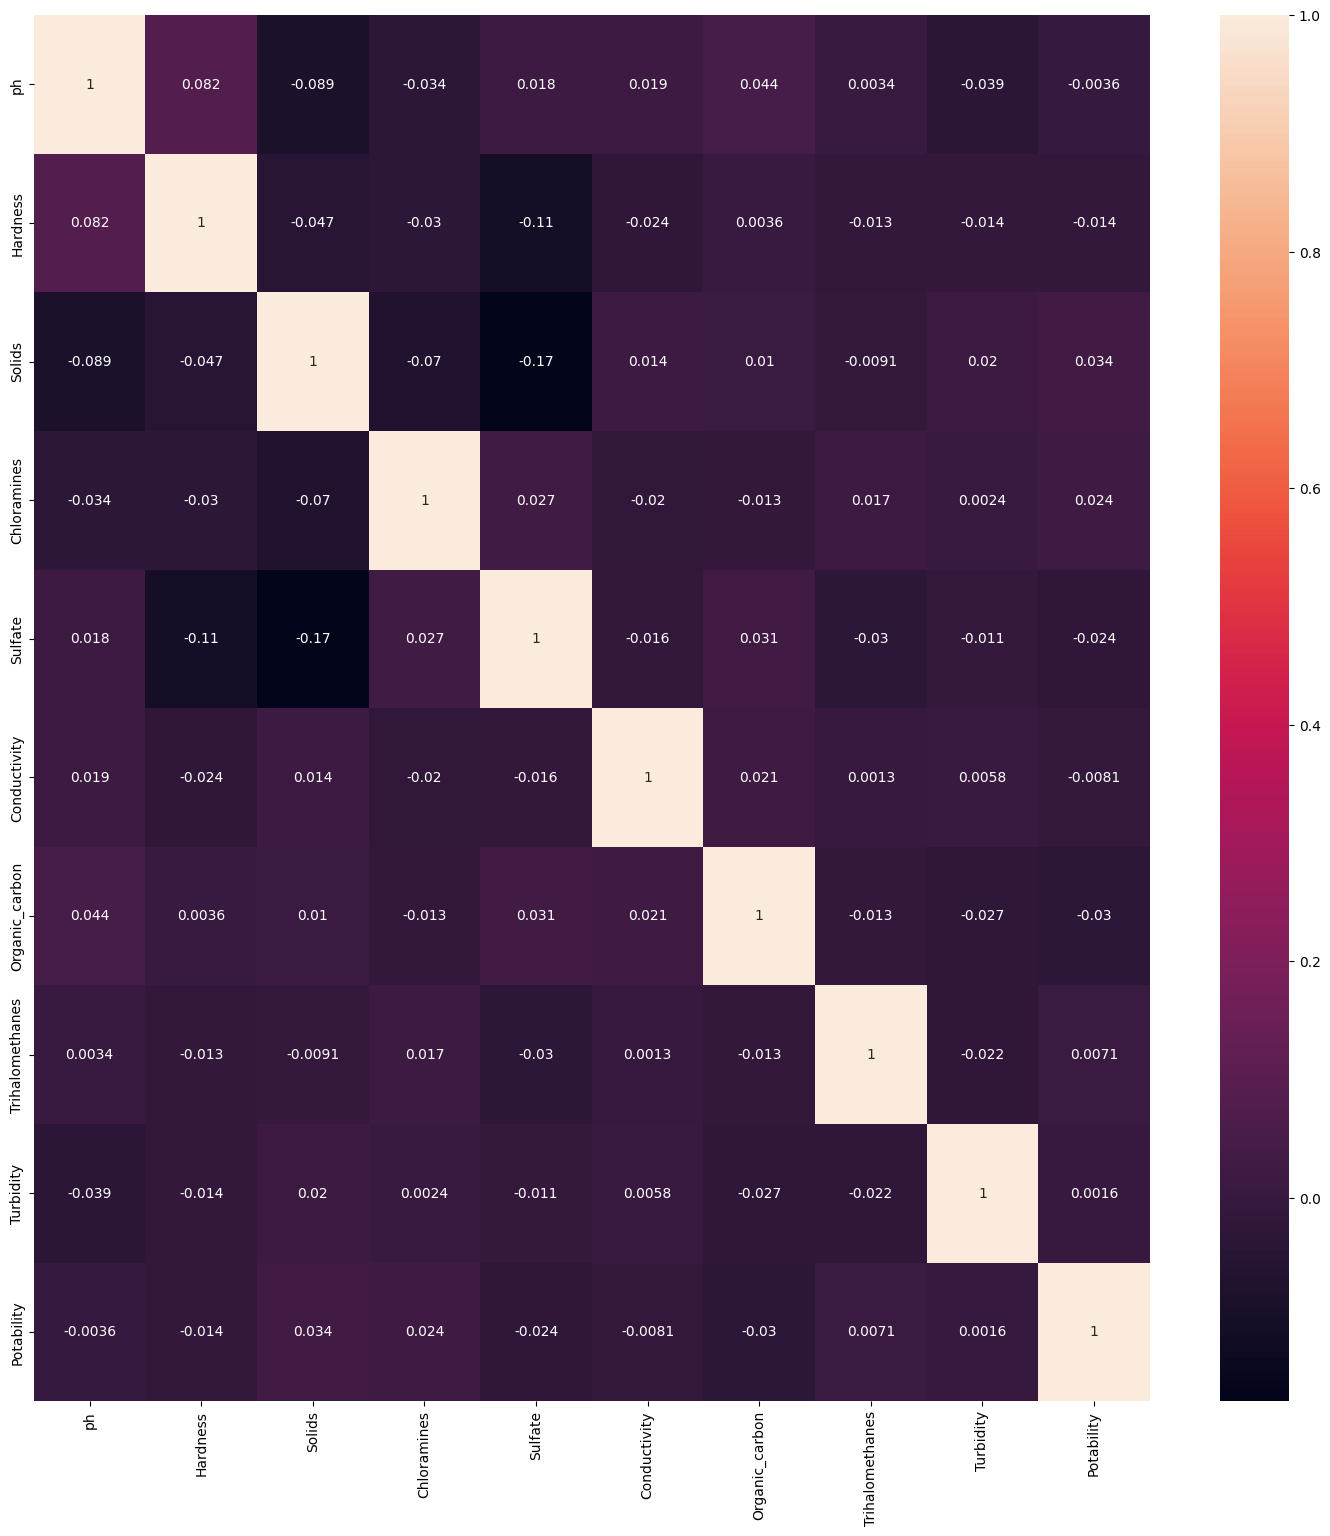

In [368]:
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(), ax = ax, annot = True)

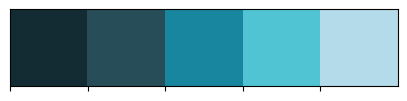

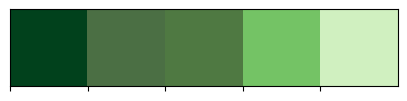

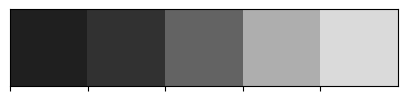

In [369]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)

# Visualizacion

**Hardenss of water**: La definición simple de dureza del agua es la cantidad de calcio y magnesio disueltos en el agua. El agua dura es rica en minerales disueltos, principalmente calcio y magnesio. Probablemente hayas sentido los efectos del agua dura, literalmente, la última vez que te lavaste las manos. Dependiendo de la dureza del agua, después de usar jabón para lavarte, podrías haber sentido como si quedara una película de residuos en tus manos. En agua dura, el jabón reacciona con el calcio (que es relativamente alto en agua dura) para formar "escamas de jabón". Al usar agua dura, se necesita más jabón o detergente para limpiar las cosas, ya sean tus manos, cabello o ropa.

In [370]:
fig = px.histogram(data,x='Hardness',y=Counter(data['Hardness']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=151, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)
fig.add_vline(x=301, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)
fig.add_vline(x=76, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<76 mg/L is<br> considered soft',x=40,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='Between 76 and 150<br> (mg/L) is<br>moderately hard',x=113,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='Between 151 and 300 (mg/L)<br> is considered hard',x=250,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='>300 mg/L is<br> considered very hard',x=340,y=130,showarrow=False,font_size=9)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Hardness Distribution',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Hardness (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

**pH level:** El pH del agua es una medida del equilibrio ácido-base y, en la mayoría de las aguas naturales, está controlado por el sistema de equilibrio dióxido de carbono–bicarbonato–carbonato. Una mayor concentración de dióxido de carbono disminuirá el pH, mientras que una disminución hará que aumente. La temperatura también afectará el equilibrio y el pH. En el agua pura, el pH disminuye aproximadamente 0.45 cuando la temperatura aumenta 25 °C. En agua con una capacidad tampón proporcionada por iones de bicarbonato, carbonato y oxidrilo, este efecto de temperatura se modifica (APHA, 1989). El pH de la mayoría del agua potable está dentro del rango de 6.5–8.5. Las aguas naturales pueden tener un pH más bajo debido, por ejemplo, a la lluvia ácida, o un pH más alto en áreas con presencia de piedra caliza.

In [371]:
fig = px.histogram(data,x='ph',y=Counter(data['ph']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=7, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<7 is Acidic',x=4,y=70,showarrow=False,font_size=10)
fig.add_annotation(text='>7 is Basic',x=10,y=70,showarrow=False,font_size=10)


fig.update_layout(
    font_family='monospace',
    title=dict(text='pH Level Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='pH Level',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

**TDS**: TDS significa concentración de partículas o sólidos disueltos en el agua. TDS está compuesto por sales inorgánicas como calcio, magnesio, cloruros, sulfatos, bicarbonatos, entre otros, junto con muchos otros compuestos inorgánicos que se disuelven fácilmente en el agua.

In [372]:
fig = px.histogram(data,x='Solids',y=Counter(data['Solids']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Distribution Of Total Dissolved Solids',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Dissolved Solids (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

**Chloramines**: Las cloraminas (también conocidas como desinfección secundaria) son desinfectantes utilizados para tratar el agua potable y:

* Se forman comúnmente cuando se añade amoníaco al cloro para tratar el agua potable.
* Proporcionan una desinfección más duradera a medida que el agua se mueve a través de las tuberías hacia los consumidores.

Las cloraminas han sido utilizadas por las empresas de servicios de agua desde la década de 1930.

In [373]:
fig = px.histogram(data,x='Chloramines',y=Counter(data['Chloramines']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=4, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<4 ppm is considered<br> safe for drinking',x=1.8,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Chloramines Distribution',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Chloramines (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

**Sulfate**: El sulfato (SO4) se puede encontrar en casi toda el agua natural. El origen de la mayoría de los compuestos de sulfato es la oxidación de minerales de sulfito, la presencia de lutitas o los desechos industriales.
El sulfato es uno de los principales componentes disueltos en la lluvia. Altas concentraciones de sulfato en el agua que bebemos pueden tener un efecto laxante cuando se combinan con calcio y magnesio, los dos componentes más comunes de la dureza.

In [374]:
fig = px.histogram(data,x='Sulfate',y=Counter(data['Sulfate']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=250, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<250 mg/L is considered<br> safe for drinking',x=175,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Sulfate Distribution',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Sulfate (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

**Conductivity**: La conductividad es una medida de la capacidad del agua para transmitir una corriente eléctrica. Dado que las sales disueltas y otros químicos inorgánicos conducen la corriente eléctrica, la conductividad aumenta a medida que aumenta la salinidad. Los compuestos orgánicos como el aceite no conducen muy bien la corriente eléctrica y, por lo tanto, tienen una baja conductividad cuando están en el agua. La conductividad también se ve afectada por la temperatura: cuanto más caliente es el agua, mayor es la conductividad.


In [ ]:
fig = px.histogram(data,x='Conductivity',y=Counter(data['Conductivity']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='The Conductivity range <br> is safe for both (200-800),<br> Potable and Non-Potable water',
                   x=600,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Conductivity Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Conductivity (μS/cm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

**Organic Carbon**: Los contaminantes orgánicos (sustancias orgánicas naturales, insecticidas, herbicidas y otros químicos agrícolas) ingresan a las vías fluviales a través del agua de escorrentía de las lluvias. Las aguas residuales domésticas e industriales también aportan contaminantes orgánicos en diferentes cantidades. Como resultado de derrames accidentales o fugas, los desechos orgánicos industriales pueden llegar a los ríos y arroyos. Algunos de estos contaminantes pueden no ser completamente eliminados por los procesos de tratamiento, por lo que podrían convertirse en un problema para las fuentes de agua potable. Es importante conocer el contenido orgánico en una vía fluvial.

In [ ]:
fig = px.histogram(data,x='Organic_carbon',y=Counter(data['Organic_carbon']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=10, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='Typical Organic Carbon<br> level is upto 10 ppm',x=5.3,y=110,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Organic Carbon Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Organic Carbon (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

**Trihalomethanes**: Los trihalometanos (THMs) son el resultado de una reacción entre el cloro utilizado para desinfectar el agua del grifo y la materia orgánica natural en el agua. En niveles elevados, los THMs se han asociado con efectos negativos para la salud, como el cáncer y resultados adversos en la reproducción.

In [ ]:
fig = px.histogram(data,x='Trihalomethanes',y=Counter(data['Trihalomethanes']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=80, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='Upper limit of Trihalomethanes<br> level is 80 μg/L',x=115,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Trihalomethanes Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Trihalomethanes (μg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

**Turbidity**: La turbidez es la medida de la claridad relativa de un líquido. Es una característica óptica del agua y es una medida de la cantidad de luz que se dispersa por el material en el agua cuando se ilumina una muestra de agua. Cuanto mayor sea la intensidad de la luz dispersada, mayor será la turbidez. El material que provoca que el agua sea turbia incluye arcilla, limo, materia inorgánica y orgánica muy pequeña, algas, compuestos orgánicos disueltos coloreados, y plancton y otros organismos microscópicos.


In [ ]:
fig = px.histogram(data,x='Turbidity',y=Counter(data['Turbidity']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=5, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<5 NTU Turbidity is<br> considered safe',x=6,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Turbidity Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Turbidity (NTU)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [376]:
trace = go.Pie(labels = ['Potable', 'Not Potable'], values = data['Potability'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of Drinkable Water')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

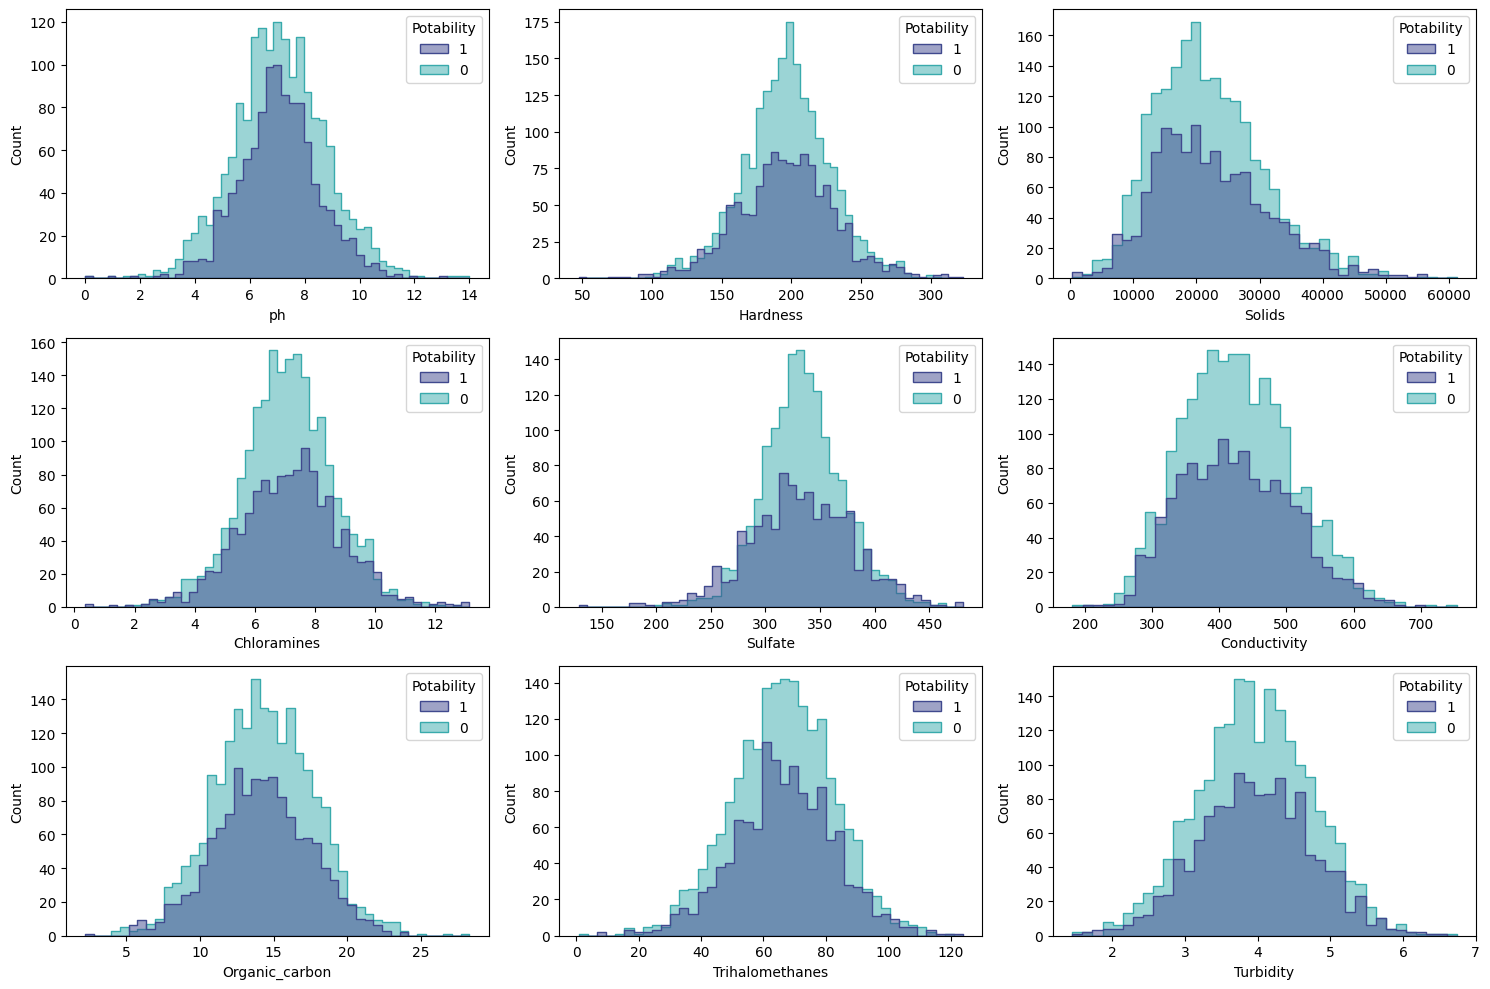

In [377]:
plt.figure(figsize = (15,10), tight_layout = True)

for i, feature in enumerate(data.columns):
    if feature != 'Potability':

        plt.subplot(3,3,i+1)
        sns.histplot(data = data, x =feature, palette = 'mako', hue = 'Potability',alpha = 0.5, element="step",hue_order=[1,0] )

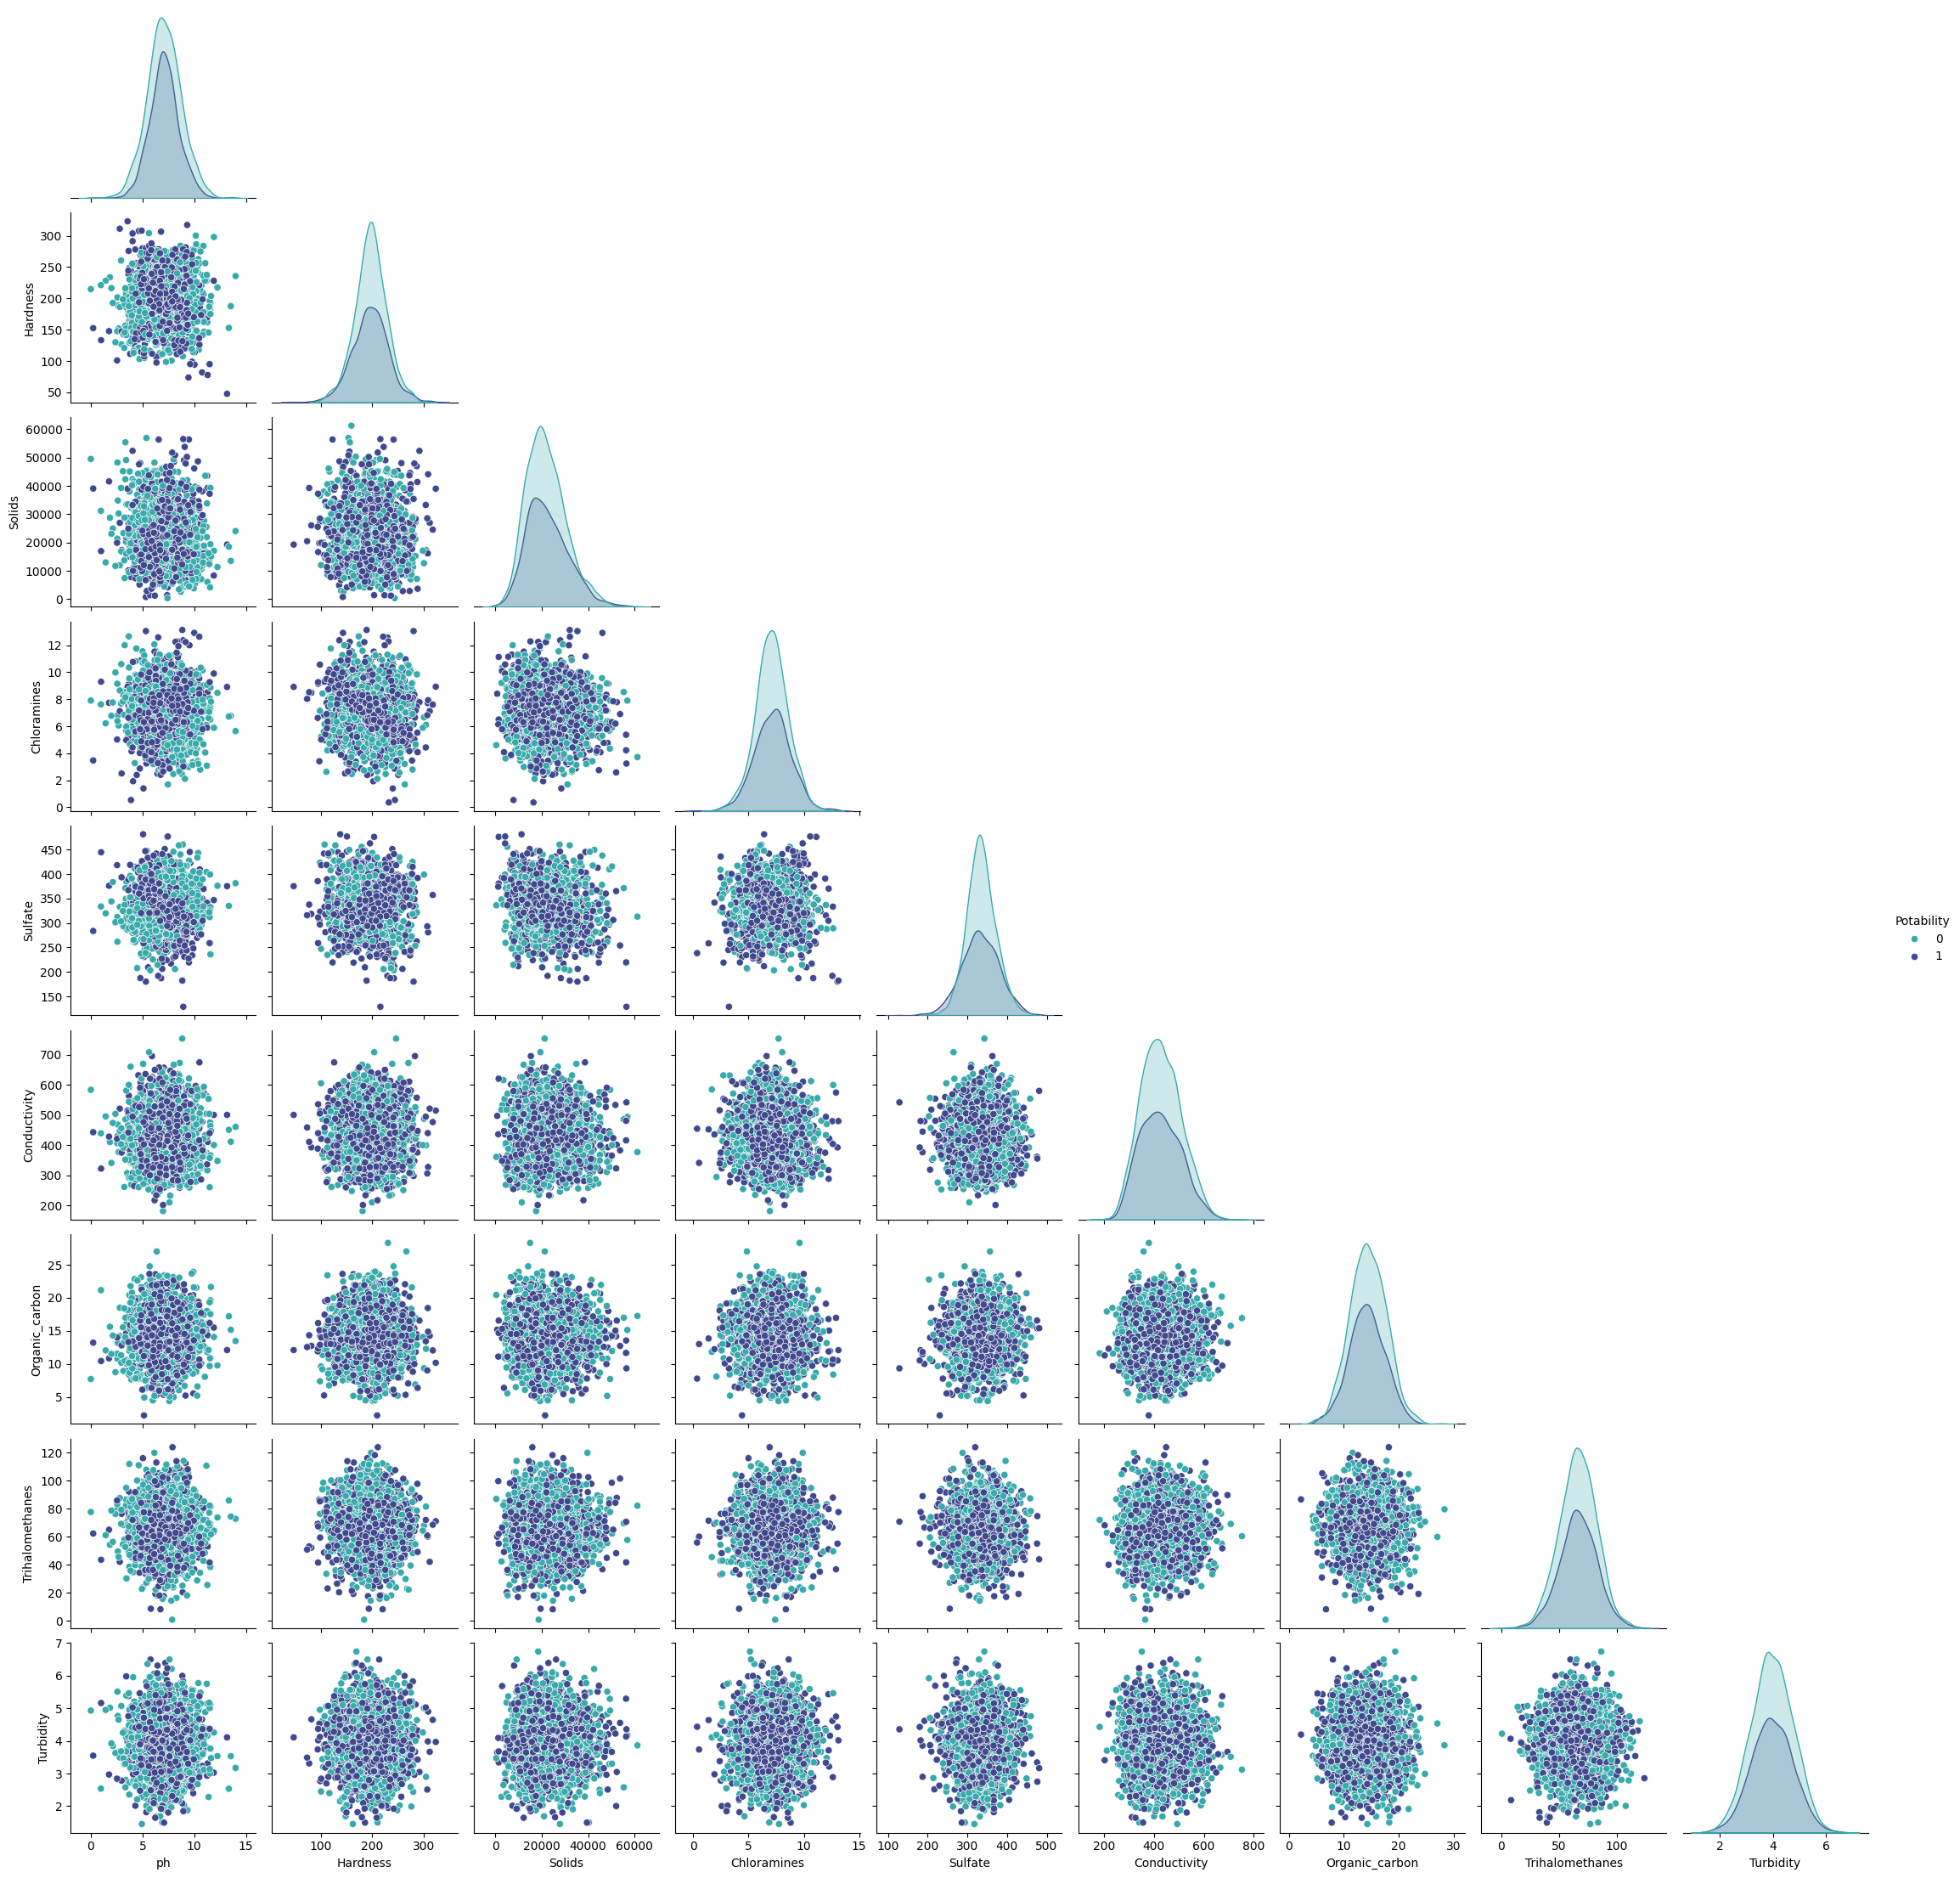

In [378]:
sns.pairplot(data = data,hue = 'Potability',palette='mako_r', corner=True)

In [379]:
data[data['Potability']==0].describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  1684.000000  1998.000000   1998.000000  1998.000000  1510.000000   
mean      7.085378   196.733292  21777.490788     7.092175   334.564290   
std       1.683499    31.057540   8543.068788     1.501045    36.745549   
min       0.000000    98.452931    320.942611     1.683993   203.444521   
25%       6.037723   177.823265  15663.057382     6.155640   311.264006   
50%       7.035456   197.123423  20809.618280     7.090334   333.389426   
75%       8.155510   216.120687  27006.249009     8.066462   356.853897   
max      14.000000   304.235912  61227.196008    12.653362   460.107069   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1998.000000     1998.000000      1891.000000  1998.000000      1998.0  
mean     426.730454       14.364335        66.303555     3.965800         0.0  
std       80.047317        3.334554        16.079320     0.780282         0.0  
min      181.483754        4.371899         0.738000     1.450000         0.0  
25%      368.498530       12.101057        55.706530     3.444062         0.0  
50%      422.229331       14.293508        66.542198     3.948076         0.0  
75%      480.677198       16.649485        77.277704     4.496106         0.0  
max      753.342620       28.300000       120.030077     6.739000         0.0

In [380]:
data[data['Potability']==1].describe()

ph     Hardness        Solids  Chloramines     Sulfate  \
count  1101.000000  1278.000000   1278.000000  1278.000000  985.000000   
mean      7.073783   195.800744  22383.991018     7.169338  332.566990   
std       1.448048    35.547041   9101.010208     1.702988   47.692818   
min       0.227499    47.432000    728.750830     0.352000  129.000000   
25%       6.179312   174.330531  15668.985035     6.094134  300.763772   
50%       7.036752   196.632907  21199.386614     7.215163  331.838167   
75%       7.933068   218.003420  27973.236446     8.199261  365.941346   
max      13.175402   323.124000  56488.672413    13.127000  481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1278.000000     1278.000000      1223.000000  1278.000000      1278.0  
mean     425.383800       14.160893        66.539684     3.968328         1.0  
std       82.048446        3.263907        16.327419     0.780842         0.0  
min      201.619737        2.200000         8.175876     1.492207         1.0  
25%      360.939023       12.033897        56.014249     3.430909         1.0  
50%      420.712729       14.162809        66.678214     3.958576         1.0  
75%      484.155911       16.356245        77.380975     4.509569         1.0  
max      695.369528       23.604298       124.000000     6.494249         1.0

In [381]:
data['ph'].fillna(value=data['ph'].median(),inplace=True)
data['Sulfate'].fillna(value=data['Sulfate'].median(),inplace=True)
data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].median(),inplace=True)

In [382]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Data Splitting

In [383]:
X = data.drop('Potability',axis=1).values
y = data['Potability'].values

In [384]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')  # Generar ejemplos sintéticos
X_resampled, y_resampled = smote.fit_resample(X, y)  # Nuevo conjunto de datos equilibrado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [385]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Machine

In [386]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Modelos a probar
models = [
    ("LR", LogisticRegression(max_iter=1000)), 
    ("SVC", SVC()), 
    ('KNN', KNeighborsClassifier(n_neighbors=10)),
    ("DTC", DecisionTreeClassifier()), 
    ("GNB", GaussianNB()), 
    ("SGDC", SGDClassifier()), 
    ("Perc", Perceptron()), 
    ("NC", NearestCentroid()),
    ("Ridge", RidgeClassifier()), 
    ("NuSVC", NuSVC()), 
    ("BNB", BernoulliNB()), 
    ('RF', RandomForestClassifier()), 
    ('ADA', AdaBoostClassifier()), 
    ('XGB', GradientBoostingClassifier()), 
    ('PAC', PassiveAggressiveClassifier())
]

# Lista para almacenar resultados y nombres
results = []
names = []
finalResults = []
confusion_matrices = {}
classification_reports = {}

# Entrenar y evaluar cada modelo
for name, model in models:
    # Entrenamiento
    model.fit(X_train, y_train)
    
    # Predicción
    model_results = model.predict(X_test)
    
    # Evaluación de precisión
    score = precision_score(y_test, model_results, average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name, score))
    
    # Matriz de confusión y reporte de clasificación
    cm = confusion_matrix(y_test, model_results)
    confusion_matrices[name] = cm  # Guardar en un diccionario
    
    report = classification_report(y_test, model_results, output_dict=True)  # Guardar como dict
    classification_reports[name] = report

# Ordenar resultados finales
finalResults.sort(key=lambda k: k[1], reverse=True)



In [387]:
from sklearn.metrics import confusion_matrix
# Función para plotear la matriz de confusión
def plot_confusion_matrix(name, class_labels):
    cm = confusion_matrices[name]  # Obtener la matriz de confusión por nombre del modelo
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

class_labels = np.unique(y_test)

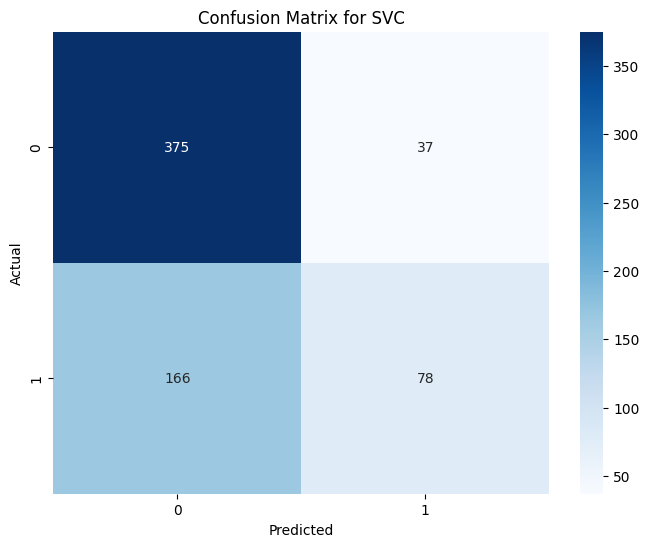

In [388]:

# Ejemplo de uso de la función
plot_confusion_matrix("SVC", class_labels) # Plotea la matriz de confusión para el modelo "LR"

In [389]:
# Mostrar resultados finales
for result in finalResults:
    print(f"{result[0]}: {result[1]}")


SVC: 0.6857108414369525
RF: 0.6622236439894789
XGB: 0.6510490917934355
KNN: 0.6376047580427142
NuSVC: 0.6135949731082593
GNB: 0.5818004459308808
ADA: 0.560533521933881
DTC: 0.5590200552651089
SGDC: 0.5394320705201534
NC: 0.500706661211738
Perc: 0.48414553387090487
PAC: 0.4798268037968413
LR: 0.31402439024390244
Ridge: 0.31402439024390244
BNB: 0.31402439024390244


## Model Deep Learning

### Model 1

In [390]:
def evaluate_model(model, X_test, y_test, threshold=0.5):
    # Realizar predicciones y convertirlas a etiquetas binarias según el umbral
    y_pred = model.predict(X_test)
    y_pred = [1 if y >= threshold else 0 for y in y_pred]
    
    # Obtener el classification_report
    report = classification_report(y_test, y_pred)
    
    # Generar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Calcular el accuracy usando la matriz de confusión
    accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
    
    return report, cm, accuracy  # Devolver el reporte, la matriz y el accuracy

In [391]:
def model_base():
    model = Sequential()  # Inicialización de la ANN
    
    # Capas densas con diferentes unidades y activaciones
    model.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))  # Primera capa
    model.add(Dense(units=9, kernel_initializer='uniform', activation='relu'))  # Segunda capa
    model.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))  # Tercera capa
    model.add(Dense(units=2, kernel_initializer='uniform', activation='relu'))  # Cuarta capa
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))  # Capa de salida
    
    # Compilación del modelo
    model.compile(optimizer='adam', loss='binary_crossentropy')  # Compilar con Adam y pérdida binaria
    
    return model  # Devolver el modelo construido

In [392]:
model_1 = model_base()
model_1.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), verbose=1)

Epoch 1/300


82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6915 - val_loss: 0.6861
Epoch 2/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6857 - val_loss: 0.6804
Epoch 3/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6816 - val_loss: 0.6759
Epoch 4/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6782 - val_loss: 0.6723
Epoch 5/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6748 - val_loss: 0.6698
Epoch 6/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6715 - val_loss: 0.6676
Epoch 7/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6713 - val_loss: 0.6662
Epoch 8/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6694 - val_loss: 0.6650
Epoch 9/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6705 - val_loss: 0.6642
Epoch 10/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6700 - val_loss: 0.6635
Epoch 11/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6714 - val_loss: 0.6629
Epoch 12/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6761 - val_lo

KeyboardInterrupt: 

<Axes: >

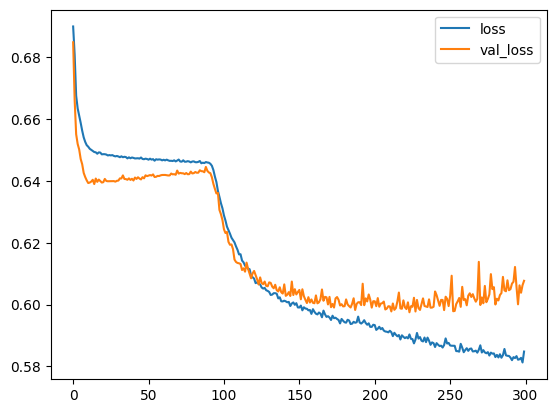

In [ ]:
model_loss = pd.DataFrame(model_1.history.history)
model_loss.plot()

In [ ]:
report, cm, accuracy = evaluate_model(model_1, X_test, y_test, threshold=0.5)

# Imprimir resultados
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)
print("Accuracy: " + str(accuracy * 100) + "%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.77       412
           1       0.60      0.40      0.48       244

    accuracy                           0.68       656
   macro avg       0.65      0.62      0.62       656
weighted avg       0.67      0.68      0.66       656

Confusion Matrix:
 [[348  64]
 [147  97]]
Accuracy: 67.83536585365853%


### Model 2 (Dropout and optimizar): 

In [ ]:
from tensorflow.keras.optimizers import Adam

def model_Dropout():
    model = Sequential()  # Inicialización de la ANN
    model.add(Dropout(0.2))  # Reducir Dropout para mejorar el aprendizaje
    # Ajustar capas y regularización
    model.add(Dense(units=16, activation='relu')) 
    model.add(Dense(units=10, activation='relu'))
    model.add(Dropout(0.2))  # Reducir Dropout para mejorar el aprendizaje
    model.add(Dense(units=8, activation='relu')) 
    model.add(Dense(units=8, activation='relu')) 
    model.add(Dropout(0.2))  # Reducir Dropout para mejorar el aprendizaje
    model.add(Dense(units=5, activation='relu')) 
    model.add(Dense(units=1, activation='sigmoid'))  # Capa de salida para clasificación binaria
    
    learning_rate = 0.001  # Reducir la tasa de aprendizaje para ajustes más finos
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy',  metrics=['accuracy'])
    
    return model  # Devolver el modelo construido

In [ ]:
model_2 = model_Dropout()
model_2.fit(x=X_train, y=y_train, epochs=350, validation_data=(X_test, y_test), verbose=1)

Epoch 1/350
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6008 - loss: 0.6948 - val_accuracy: 0.6280 - val_loss: 0.6733
Epoch 2/350
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6048 - loss: 0.6727 - val_accuracy: 0.6280 - val_loss: 0.6661
Epoch 3/350
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6065 - loss: 0.6766 - val_accuracy: 0.6280 - val_loss: 0.6647
Epoch 4/350
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6091 - loss: 0.6707 - val_accuracy: 0.6280 - val_loss: 0.6613
Epoch 5/350
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5810 - loss: 0.6814 - val_accuracy: 0.6280 - val_loss: 0.6573
Epoch 6/350
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6261 - loss: 0.6589 - val_accuracy: 0.6280 - val_loss: 0.6574
Epoch 7/350
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6025 - loss: 0.6694 - val_accuracy: 0.6280 - val_loss: 0.6557
Epoch 8/350
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5902 - loss: 0.6746 - val_accuracy: 0.6280 - v

<Axes: >

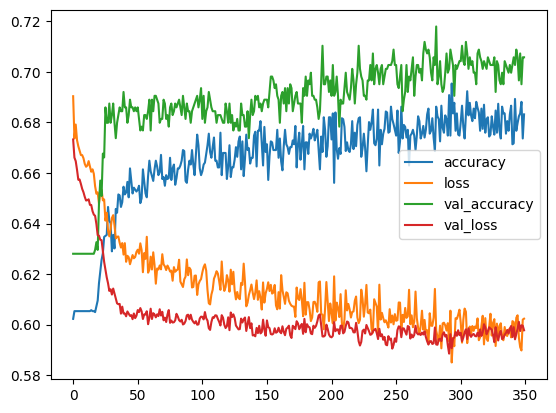

In [ ]:
model_loss = pd.DataFrame(model_2.history.history)
model_loss.plot()

In [ ]:
report_2, cm_2, accuracy_2 = evaluate_model(model_2, X_test, y_test, threshold=0.5)

# Imprimir resultados
print("Classification Report:\n", report_2)
print("Confusion Matrix:\n", cm_2)
print("Accuracy: " + str(accuracy_2 * 100) + "%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.93      0.80       412
           1       0.74      0.32      0.45       244

    accuracy                           0.71       656
   macro avg       0.72      0.63      0.62       656
weighted avg       0.72      0.71      0.67       656

Confusion Matrix:
 [[385  27]
 [166  78]]
Accuracy: 70.57926829268293%


### Model 3 (Menor cantidad de neuronas)

In [ ]:
def model_minor():
    model = Sequential()
    model.add(Dropout(0.2))  # Para reducir el sobreajuste
    model.add(Dense(units=16,activation='relu'))
    model.add(Dense(units=8,activation='relu'))
    model.add(Dropout(0.2))  # Para reducir el sobreajuste
    model.add(Dense(units=4,activation='relu'))
    model.add(Dense(units=1,activation='sigmoid'))
    learning_rate=0.001  
    # Compilación del modelo
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy',  metrics=['accuracy'])  # Compilar con Adam y pérdida binaria
    return model

In [ ]:
model_3 = model_minor()
model_3.fit(x=X_train, y=y_train, epochs=350, validation_data=(X_test, y_test), verbose=1)

Epoch 1/350
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5654 - loss: 0.6849 - val_accuracy: 0.6235 - val_loss: 0.6796
Epoch 2/350
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5870 - loss: 0.6842 - val_accuracy: 0.6280 - val_loss: 0.6726
Epoch 3/350
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5990 - loss: 0.6820 - val_accuracy: 0.6280 - val_loss: 0.6655
Epoch 4/350
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6019 - loss: 0.6693 - val_accuracy: 0.6280 - val_loss: 0.6615
Epoch 5/350
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6181 - loss: 0.6649 - val_accuracy: 0.6280 - val_loss: 0.6575
Epoch 6/350
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6044 - loss: 0.6679 - val_accuracy: 0.6280 - val_loss: 0.6560
Epoch 7/350
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5950 - loss: 0.6709 - val_accuracy: 0.6280 - val_loss: 0.6537
Epoch 8/350
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6074 - loss: 0.6638 - val_accuracy: 0.6280 - v

<Axes: >

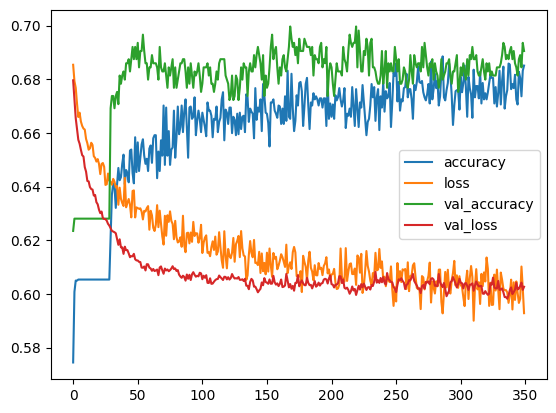

In [ ]:
model_loss = pd.DataFrame(model_3.history.history)
model_loss.plot()

In [ ]:
report_3, cm_3, accuracy_3 = evaluate_model(model_3, X_test, y_test, threshold=0.5)

# Imprimir resultados
print("Classification Report:\n", report_3)
print("Confusion Matrix:\n", cm_3)
print("Accuracy: " + str(accuracy_3 * 100) + "%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.89      0.78       412
           1       0.66      0.35      0.46       244

    accuracy                           0.69       656
   macro avg       0.68      0.62      0.62       656
weighted avg       0.68      0.69      0.66       656

Confusion Matrix:
 [[368  44]
 [159  85]]
Accuracy: 69.0548780487805%
